## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 21s 424us/step - loss: 2.3044 - accuracy: 0.0995 - val_loss: 2.3033 - val_accuracy: 0.1000 - accuracy
Epoch 49/50
50000/50000 [==============================] - 25s 497us/step - loss: 2.3041 - accuracy: 0.1004 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 18s 369us/step - loss: 2.3043 - accuracy: 0.0975 - val_loss: 2.3035 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________

50000/50000 [==============================] - 18s 367us/step - loss: 0.4638 - accuracy: 0.8333 - val_loss: 2.0896 - val_accuracy: 0.5223
Epoch 46/50
50000/50000 [==============================] - 19s 379us/step - loss: 0.4364 - accuracy: 0.8435 - val_loss: 2.0860 - val_accuracy: 0.5379
Epoch 47/50
50000/50000 [==============================] - 26s 519us/step - loss: 0.4220 - accuracy: 0.8488 - val_loss: 2.1273 - val_accuracy: 0.5225
Epoch 48/50
50000/50000 [==============================] - 23s 452us/step - loss: 0.4009 - accuracy: 0.8567 - val_loss: 2.2728 - val_accuracy: 0.5143
Epoch 49/50
50000/50000 [==============================] - 23s 453us/step - loss: 0.4077 - accuracy: 0.8546 - val_loss: 2.1318 - val_accuracy: 0.5232
Epoch 50/50
50000/50000 [==============================] - 17s 348us/step - loss: 0.3841 - accuracy: 0.8618 - val_loss: 2.2465 - val_accuracy: 0.5304
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 18s 352us/step - loss: 0.9656 - accuracy: 0.6612 - val_loss: 1.5869 - val_accuracy: 0.4741
Epoch 43/50
50000/50000 [==============================] - 22s 442us/step - loss: 0.9512 - accuracy: 0.6650 - val_loss: 1.3831 - val_accuracy: 0.5302
Epoch 44/50
50000/50000 [==============================] - 21s 420us/step - loss: 0.9436 - accuracy: 0.6676 - val_loss: 1.3642 - val_accuracy: 0.5295
Epoch 45/50
50000/50000 [==============================] - 19s 381us/step - loss: 0.9307 - accuracy: 0.6732 - val_loss: 1.4166 - val_accuracy: 0.5225
Epoch 46/50
50000/50000 [==============================] - 24s 471us/step - loss: 0.9202 - accuracy: 0.6765 - val_loss: 1.3897 - val_accuracy: 0.5275
Epoch 47/50
50000/50000 [==============================] - 18s 352us/step - loss: 0.9075 - accuracy: 0.6817 - val_loss: 1.3545 - val_accuracy: 0.5405
Epoch 48/50
50000/50000 [==============================] - 25s 490us/step - loss: 0.8951 - accuracy: 0.6852 - va

50000/50000 [==============================] - 27s 542us/step - loss: 1.6021 - accuracy: 0.4413 - val_loss: 1.6124 - val_accuracy: 0.4322
Epoch 40/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.5974 - accuracy: 0.4437 - val_loss: 1.6073 - val_accuracy: 0.4379
Epoch 41/50
50000/50000 [==============================] - 26s 530us/step - loss: 1.5928 - accuracy: 0.4443 - val_loss: 1.6020 - val_accuracy: 0.4399
Epoch 42/50
50000/50000 [==============================] - 21s 416us/step - loss: 1.5875 - accuracy: 0.4471 - val_loss: 1.5992 - val_accuracy: 0.4388
Epoch 43/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.5828 - accuracy: 0.4479 - val_loss: 1.5951 - val_accuracy: 0.4406
Epoch 44/50
50000/50000 [==============================] - 24s 486us/step - loss: 1.5783 - accuracy: 0.4500 - val_loss: 1.5889 - val_accuracy: 0.4418
Epoch 45/50
50000/50000 [==============================] - 26s 520us/step - loss: 1.5743 - accuracy: 0.4511 - va

50000/50000 [==============================] - 23s 470us/step - loss: 1.9766 - accuracy: 0.3105 - val_loss: 1.9779 - val_accuracy: 0.3141
Epoch 37/50
50000/50000 [==============================] - 24s 477us/step - loss: 1.9723 - accuracy: 0.3123 - val_loss: 1.9737 - val_accuracy: 0.3163
Epoch 38/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.9681 - accuracy: 0.3139 - val_loss: 1.9696 - val_accuracy: 0.3176
Epoch 39/50
50000/50000 [==============================] - 25s 507us/step - loss: 1.9640 - accuracy: 0.3152 - val_loss: 1.9656 - val_accuracy: 0.3192
Epoch 40/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.9601 - accuracy: 0.3168 - val_loss: 1.9618 - val_accuracy: 0.3209
Epoch 41/50
50000/50000 [==============================] - 27s 541us/step - loss: 1.9562 - accuracy: 0.3181 - val_loss: 1.9581 - val_accuracy: 0.3226
Epoch 42/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.9525 - accuracy: 0.3198 - va

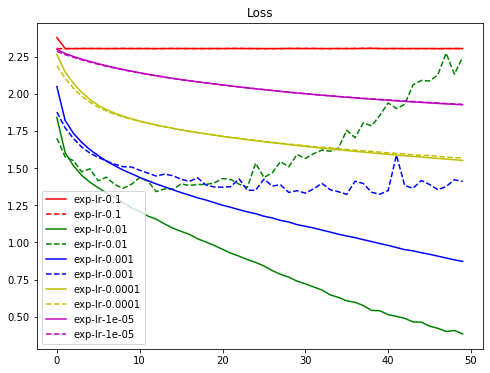

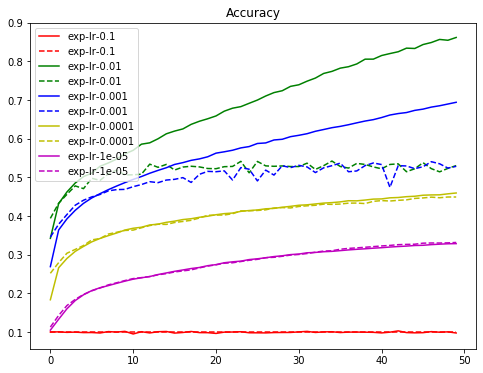

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()